# Machine Learning for Biomarker Discovery: Practical Exercises

## Objectives 

These exercises are to help you work through some of the concepts from the lecture, to get a practical idea of how to use machine learning to help in biomarker discovery.  
  
This is by no means a comprehensive notebook! It's intended to give you a flavour of some of the tools that are out there for this problem. Ultimately, biomarker discovery is a research area in its own right, and machine learning takes much longer than a couple of hours to learn!  

The main goals for this practical exercise are:
* to understand how Jupyter notebooks can be used as a Python development environment
* to appreciate how to use documentation and LLMs to aid you in writing code
* to learn how to use Pandas to read in and manipulate a dataset
* to perform exploratory data analysis using Pandas on a dataset
* to use UMAP for dimensionsality reduction and visualisation
* to understand how to build a ML-based classifier for biomarkers
* to use clustering on a dataset 
  
Throughout this notebook, where you see this symbol &#x2753;, that is a task that you should try to complete. 

## Tips
  
* The only way to learn how to code is to try, and fail: it's okay to make mistakes 
* More of your time coding is spent fixing problems ("debugging") than it is writing new things
* Ask for help from your peers and your instructors
* You can use ChatGPT/other AI for help, and it will be very good at it, but **try to write the code yourself first**. This is a learning exercise, it is not assessed, and you will learn better if you try to solve the problem yourself first


### 1) Writing Python in a Jupyter Notebook

Python files come in two varieties.  

Files that end `.py` are *scripts*. This contains code that is executed once when you run the file. You can run these from your command line, using something like ``python file.py``. You can also use an integrated development environment (IDE), like `Spyder`, `Pycharm`, `IDL`.  

When developing a complicated program, which is sometimes called a library, you use these scripts to break up your workflow into several little pieces. This separates concerns: it means you can test each file separately and ensure that errors are easy to track down. This is the workflow that is absolutely used in practice.  
  
For learning, experimentation, or data exploration, people like to use *Jupyter Notebooks*. This file is one of those. They have the file ending `.ipynb`. These show the intermediate results of the code as you run it, in plain text. This is great for communicating or summarising results, and quick experimentation. We're going to use them exclusively.  

It's worth saying: if you were trying to do machine learning as part of a project, then you should eventually transition to using Python scripts. But it is common to start off with `.ipynb` notebooks until you work out what you are trying to do.

Jupyter notebooks divide the project into cells, which can be run separately. There are two types of cells, `Code` and `Markdown`.  
`Code` cells contain Python code that is to be run, `Markdown` cells are plain text, and they are useful for writing some commentary on what you are doing so that you can go back later. At the top of 
  
It is important to remember that Jupyter notebooks contain persistent memory. If you create a variable in one cell, it has the same value in other cells. This is one reason why you should try to name your variables sensible things (rather than calling everything `a` or `x`). 

Useful commands: 
* To add a cell, push the &#43; symbol
* To convert a cell between Python/Markdown, find the Dropdown menu and select what you want
* To delete a cell, press the dustbin symbol.
* To run a cell, either press Control + Enter, or find the play symbol (&#9654;) on the top of the page 


Tasks: 
* &#x2753; 1. Explore the Jupyter notebook environment. Create a Markdown cell and a Python cell. Delete both the cells.
* &#x2753; 2. In a Python cell, calculate what the square root of $97969$ is and print it to screen.
* &#x2753; 3. Create a new Python cell. Create a variable called `a` and give it whatever value you want. Reset your Jupyter notebook and check what happens if you try to `print(a)` in a new cell


### 2) Using Pandas to read in a Python File

`Pandas` is a library that is written to support data analysis. A library is a large set of `.py` files that have been developed to aid a workflow. In Python, a lot of the things that you might want to do have already been implemented in a library. Where possible, you should always try to use these, because they are often: 
* better tested
* more efficient
* easier to use 
  
than anything you might build yourself!

To import a library that we want to use, we use `import LIBRARYNAME as NAME`, where `LIBRARYNAME` is the full name of the library and `NAME` is a helpful shortcut. Whenever we want to use a function or piece of code from the library, we use `NAME.function()`.  

For example, let's say we want to use the `numpy` library, which implements numerical routines for arrays. Arrays are ordered arrangements of data. The following code snippet:
* imports the numpy library 
* uses a numpy function to build a particular array
* prints that array
* uses a numpy function to calculate the mean value of the array
* prints that mean value

&#x2753; Can you predict what will be printed in the following cell before you run it? Run the cell and see if you were right



In [1]:
import numpy as np 

arr = np.array([1, 2, 3, 4, 5])
print(arr)
mean = np.mean(arr)
print(mean)

[1 2 3 4 5]
3.0


&#x2753; There is an error in the following cell. Correct the error and re-run the cell.

In [29]:
import numpy as np 

arr = np.random.randn(100) # this generates an array of random numbers

print(numpy.mean(arr))

NameError: name 'numpy' is not defined

&#x2753; In the following cell, do the following:
* import numpy 
* use the `random.randn()` function from numpy to generate an array of 50 random numbers
* use the `std()` function from numpy to calculate the standard deviation of the array


In [ ]:
# write your code here 

For data science, the most important library is `pandas`, which contains routines for interacting with datasets.  
  
The first thing we need to do is open whatever file we've been sent with the data in. Pandas offers us a routine to do this: `read_csv()`. We give it as arguments: 
* the *path* to the file, which tells the code how to get from the Jupyter notebook to the data file. You can use the relative or absolute path. So this might be something like `"data/file.csv"` or it might be something like `"C:\Users\griffin\Documents\data\file.csv"`. 
* the separator used in the file. Files are sent in different formats, and most important is how data in the file is separated. `.csv` files commonly use a comma `","` to separate values, but you might also have data separated by tabs `"\t"` or by some other weird character. You may need to experiment with different separators to get the data to read correctly.

Putting this all together, we use the code as something like: 
```python
import pandas as pd
data = pd.read_csv("data/file.csv", sep=",")
```

The most common error you will get is a `FileNotFoundError` which happens where there isn't a file at the path that you said. You just need to adjust the code to make sure you have the right path. Remember, the path is either the absolute path, or it is how to get from the `.ipynb` file to the datafile. 
Also notice that we assign the output of this function to some variable, which *is* our data

&#x2753; In the code cell below: 
* import pandas 
* use pandas to read in the file "file1.csv", which is stored in the "data" folder. What separator do you think you need?
* call that variable data1
* use pandas to read in the file "file2.tsv", which is stored in the "data" folder. What separator do you think you need? W
* call that variable data2

Reading in datasets can be surprisingly tedious. There are other things that could be happening in the data. You may need to open the data manually or in Excel, to try to understand what you have been sent. Remember: mistakes are inevitable, it's okay to change and modify your code until it works!

Once we have opened the file and assigned our data to a variable, we have what is called a *dataframe*, which you can think of a bit like an Excel spreadsheet. It represents the data as rows and columns. Pandas allows lots of routines for manipulating the dataframe to answer questions we might be interested in. 

The next few cells show how we can manipulate these dataframes

### 1) `.head()` and `.tail()`

We can visualise the first few rows or last few rows of the dataframe using `.head()` or `.tail()`. This can sometimes make it clear if we've read the file in incorrectly. 

In [7]:
import pandas as pd

df = pd.read_csv("data/file1.csv", sep=",")

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


You can see that the data has columns and rows. The columns are "features", like here various measurements of flowers or the type of flowers. The rows are samples. The columns do not all need to be the same data type. You can see that some of them are decimals, some of them are strings here. The far left column, which here just looks like numbers counting up is the "index". 

In [8]:
print(df.tail())

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


Here, I deliberately read in the file using the wrong separator (using tabs instead of commas). The code still runs, but when I print df.head(), you can see it doesn't quite look right. There are commas in the output. This is a strong indicator we've read in the file wrong.

In [10]:
df = pd.read_csv("data/file1.csv", sep="\t")

print(df.head())

  sepal_length,sepal_width,petal_length,petal_width,species
0                             5.1,3.5,1.4,0.2,setosa       
1                             4.9,3.0,1.4,0.2,setosa       
2                             4.7,3.2,1.3,0.2,setosa       
3                             4.6,3.1,1.5,0.2,setosa       
4                             5.0,3.6,1.4,0.2,setosa       


### 2) Sorting values in our dataframe
Very commonly, you want to sort rows in the dataframe based on one of the columns. This makes it easier to sometimes see what is going on. You can see that below.
By default, it sorts from smallest value to highest value for numbers or alphabetically for letters.

In [13]:
df = pd.read_csv("data/file1.csv", sep=",")
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [15]:
df_sorted = df.sort_values(by="sepal_width")
print(df_sorted.head())
print(df_sorted.tail())

     sepal_length  sepal_width  petal_length  petal_width     species
60            5.0          2.0           3.5          1.0  versicolor
62            6.0          2.2           4.0          1.0  versicolor
119           6.0          2.2           5.0          1.5   virginica
68            6.2          2.2           4.5          1.5  versicolor
41            4.5          2.3           1.3          0.3      setosa
    sepal_length  sepal_width  petal_length  petal_width species
16           5.4          3.9           1.3          0.4  setosa
14           5.8          4.0           1.2          0.2  setosa
32           5.2          4.1           1.5          0.1  setosa
33           5.5          4.2           1.4          0.2  setosa
15           5.7          4.4           1.5          0.4  setosa


In [16]:
df_sorted = df.sort_values(by="sepal_length", ascending=False)
print(df_sorted.head())
print(df_sorted.tail())

     sepal_length  sepal_width  petal_length  petal_width    species
131           7.9          3.8           6.4          2.0  virginica
135           7.7          3.0           6.1          2.3  virginica
122           7.7          2.8           6.7          2.0  virginica
117           7.7          3.8           6.7          2.2  virginica
118           7.7          2.6           6.9          2.3  virginica
    sepal_length  sepal_width  petal_length  petal_width species
41           4.5          2.3           1.3          0.3  setosa
42           4.4          3.2           1.3          0.2  setosa
38           4.4          3.0           1.3          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
13           4.3          3.0           1.1          0.1  setosa


&#x2753; Some questions to ask yourself to make sure you understand: 
* how would we sort by the column "petal_width"?
* what do you think the `ascending=True` part is doing? What if I made it `ascending=False`?

In the next cell, I sort by two things. What do you think will happen here?

In [20]:
df_sorted = df.sort_values(by=["sepal_width", "sepal_length"])
print(df_sorted.head())

     sepal_length  sepal_width  petal_length  petal_width     species
60            5.0          2.0           3.5          1.0  versicolor
62            6.0          2.2           4.0          1.0  versicolor
119           6.0          2.2           5.0          1.5   virginica
68            6.2          2.2           4.5          1.5  versicolor
41            4.5          2.3           1.3          0.3      setosa


&#x2753; In the below cell: 
* read in `"file2.csv"` from the `"data"` directory 
* sort the dataframe so that the rows are in order of `petal_length`, from smallest to largest

In [21]:
import pandas as pd 
data = ... 

### 3) Filtering Data
So far, you might not see why Pandas is useful at all. It seems to do similar things to Excel, but be a bit harder to use. It seems to just take longer to do most of the things that we are interested in doing. The real benefit of Pandas is in its ability to subset and filter dataframes to accomplish things we want to do. In the next few cells, we show how we can do this using the "titanic" dataset.

To get a single column from a dataframe, we can use square brackets `[]`, like this:

In [23]:
import pandas as pd 

df = pd.read_csv("data/titanic.csv", sep=",")
print(df.head())

   survived  pclass     sex   age     fare embarked  class alive
0         0       3    male  22.0   7.2500        S  Third    no
1         1       1  female  38.0  71.2833        C  First   yes
2         1       3  female  26.0   7.9250        S  Third   yes
3         1       1  female  35.0  53.1000        S  First   yes
4         0       3    male  35.0   8.0500        S  Third    no


In [ ]:
print(df["age"]) # this just gives us the values in the "age" column

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64


We can also index multiple columns, using double brackets `[[]]`

In [25]:
print(df[["age", "class"]])

           age   class
0    22.000000   Third
1    38.000000   First
2    26.000000   Third
3    35.000000   First
4    35.000000   Third
..         ...     ...
886  27.000000  Second
887  19.000000   First
888  29.699118   Third
889  26.000000   First
890  32.000000   Third

[891 rows x 2 columns]


By combining this with logical statements, we can filter the dataframe. For example, here we filter the dataframe to only show female titanic victims

In [27]:
df[df["sex"] == "female"]

,survived,pclass,sex,age,fare,embarked,class,alive
1,1,1,female,38.000000,71.2833,C,First,yes
2,1,3,female,26.000000,7.9250,S,Third,yes
3,1,1,female,35.000000,53.1000,S,First,yes
8,1,3,female,27.000000,11.1333,S,Third,yes
9,1,2,female,14.000000,30.0708,C,Second,yes
...,...,...,...,...,...,...,...,...
880,1,2,female,25.000000,26.0000,S,Second,yes
882,0,3,female,22.000000,10.5167,S,Third,no
885,0,3,female,39.000000,29.1250,Q,Third,no
887,1,1,female,19.000000,30.0000,S,First,yes


What is going on here?

In [28]:
# look what happens if we just do df["sex"] == "female"
df["sex"] == "female"

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: sex, Length: 891, dtype: bool

The logical statement `df["sex"] == female` means that we are asking Pandas to filter our dataframe to return only elements where the value in the "sex" column is "female". You can see this produces an array where the elements are all either `True` or `False`. By then slicing the dataframe with the logic statement, we identify all the places where this is true. You can see this prints all columns of the dataframe, not just the "sex" column

In [30]:
logical_statement = df["sex"] == "female"
df[logical_statement]

,survived,pclass,sex,age,fare,embarked,class,alive
1,1,1,female,38.000000,71.2833,C,First,yes
2,1,3,female,26.000000,7.9250,S,Third,yes
3,1,1,female,35.000000,53.1000,S,First,yes
8,1,3,female,27.000000,11.1333,S,Third,yes
9,1,2,female,14.000000,30.0708,C,Second,yes
...,...,...,...,...,...,...,...,...
880,1,2,female,25.000000,26.0000,S,Second,yes
882,0,3,female,22.000000,10.5167,S,Third,no
885,0,3,female,39.000000,29.1250,Q,Third,no
887,1,1,female,19.000000,30.0000,S,First,yes


Here are some of the logical operators we might use:  

| Operator | Meaning |
|----------|---------|
| `<`      | Less than |
| `<=`     | Less than or equal to |
| `>`      | Greater than |
| `>=`     | Greater than or equal to |
| `!=`     | Not equal to |
| `==`     | Equal to |
  
We can even combine multiple logical statements using: 
* `&` ➜ "and"
* `|` ➜ "or"

For example, this is perfectly valid code: 
```python
df[(df["age"] <= 30) & (df["class"] == "First")]
```
This finds all the passengers under 30 who are also in First Class. 
Notice that we put the separate logical statements in brackets to make it clear. This code would be too confusing 
```python
df[df["age"] <= 30 & df["class"] == "First"]
```
Python is not *clever*. It looks like you are asking to find values in the age column that are under 30 and `df["class"]`, which doesn't make any sense. You must use brackets to separate the different statements.

&#x2753; Using the Titanic dataset, write code to do the following filters. Write each one in a new cell:
* Find all the passengers who were in Second Class
* Find all the passengers who did not embark at "S" (Southampton)
* Find all the passengers who were above the age of 50 and in third class
* Find all the passengers who were either female or in second class

In [31]:
df = pd.read_csv("data/titanic.csv", sep="\t")
print(df.columns) # df.columns gives you the columns in the dataset

Index(['survived,pclass,sex,age,fare,embarked,class,alive'], dtype='str')


In [ ]:
# write your solutions to the task in the next few cells


### 4) Pandas Operations

Another very useful thing we can do once we have a dataframe is carry out quick analysis on it using functions that are in-built to pandas.  
  
For example, if we had a dataframe `df` with a column called `age`, we can get the mean age using `df["age"].mean()`. These inbuilt functions are usually very intuitively named.

Here are some examples: 
| Function | Meaning |
|----------|---------|
| `.mean()`      | Mean value |
| `.median()`     | Median value |
| `.var()`      | Variance |
| `.std()`     | Standard deviation |
| `.max()`     | Maximum |
| `.min()`     | Minimum |
| `.summary()`      | Summary: produces a summary of the key statistics of the data |
| `.shape`      | How many rows and columns does our data have?
| `.value_counts()`     | Tells us what different values appear in the column |

By combining this with filtering, we can start to answer some real questions about our data. The first, and most important, stage of data science or analysis is to really understand the data that you have. This is sometimes called **data exploration** or **exploratory data analysis**.   

This is the task of understanding how your data behaves, perhaps gaining some ideas about its original distribution, or variables within it that might be related. Some of the things that you might want to investigate:
* what is the distribution of each of the variables in the data? Is it a Bell curve? Or more uniform? 
* what are the maximum/minimum values in my data? What might that tell me?
* are there any obvious problems in the data? 
* which variables are "useful" in analysis and which aren't? (if a variable is the same for every single patient, is it useful?)

Pandas is an *excellent* tool for doing this kind of exploratory data analysis

&#x2753; 1) Using the titanic dataset, how many passengers do we have?

In [38]:
df = pd.read_csv("data/titanic.csv", sep=",")
...

&#x2753; 2) What is the mean and standard deviation in age of Titanic passengers?

In [40]:
df

,survived,pclass,sex,age,fare,embarked,class,alive
0,0,3,male,22.000000,7.2500,S,Third,no
1,1,1,female,38.000000,71.2833,C,First,yes
2,1,3,female,26.000000,7.9250,S,Third,yes
3,1,1,female,35.000000,53.1000,S,First,yes
4,0,3,male,35.000000,8.0500,S,Third,no
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,Second,no
887,1,1,female,19.000000,30.0000,S,First,yes
888,0,3,female,29.699118,23.4500,S,Third,no
889,1,1,male,26.000000,30.0000,C,First,yes


&#x2753; 3) What is the average fare of the first class, the second class and the third class passengers?

&#x2753; 4) Of the passengers who survived (`survived == 1`), what is the median age? What is the minimum and maximum age?

&#x2753; 5) What are the different embarkment points? 

<details>
<summary><strong>Hint</strong> (click to reveal)</summary>

Use `.value_counts()` on the correct column
</details>

### 5) Plotting 

We can also use pandas to plot and visualise our data directly, which is really useful.

```python
df["age"].hist(bins=20) 
```
produces a histogram of our data with 20 bins. If you look at the documentation, you can see the other things you can adjust in this histogram (like colors)
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html 

<Axes: >

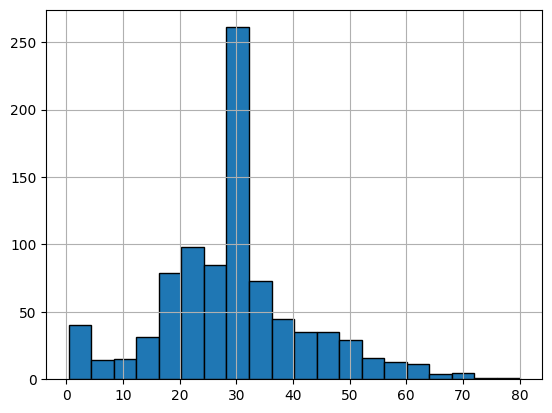

In [ ]:
df = pd.read_csv("data/titanic.csv", sep=",")
df["age"].hist(bins=20, ec="black") # ec = "black" gives the borders of our histogram a black colour

From this histogram, you can immediately see most of the passengers were near 30, with a much smaller number at high ages.  

What if we compare the histograms of the passengers who survived and did not survive?

<Axes: >

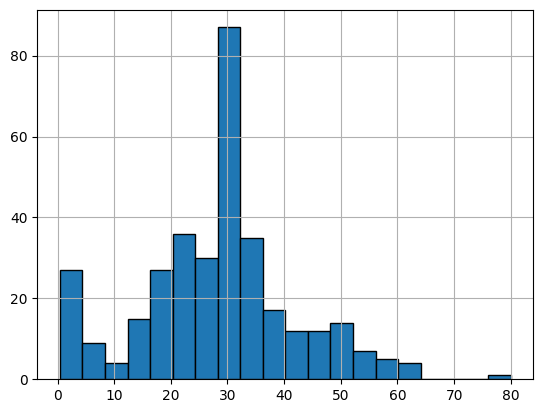

In [ ]:
df[df["survived"] == 1]["age"].hist(bins=20, ec="black")

# we combine the filtering for survival, and then separately use square brackets to get the "age" column 

<Axes: >

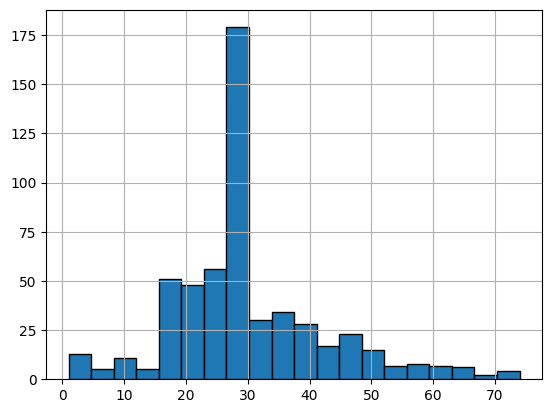

In [47]:
df[df["survived"] == 0]["age"].hist(bins=20, ec="black")

* Histograms using `df[COLUMN].hist()` are useful for visualising distributions, which is very often something we are interested in
* For numerical data, we can also plot it as a straight line graph using `df[COLUMN].plot()`. This is most useful when we have data that represents some process over time, like temperatures

<Axes: >

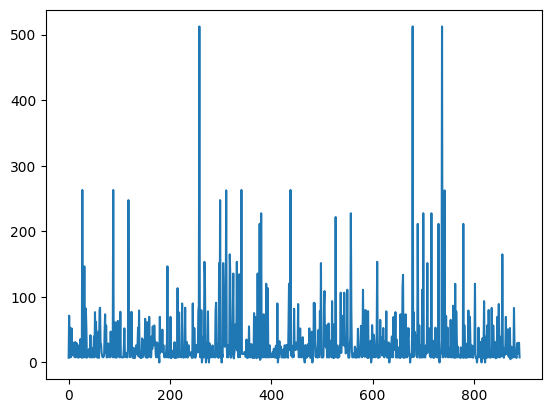

In [ ]:
df["fare"].plot()

See we can plot fare, but it doesn't really tell us very much. The y-axis is the column we are plotting and the x-axis is the index. If the dataframe index represented time, then `.plot()` would be more useful

&#x2753; Using the Iris dataset (`"data/file1.csv"`), plot a separate histogram of the petal width for each of the three species. Can you see any notable differences?

<details>
<summary><strong>Hint</strong> (click to reveal)</summary>

* First, what are the different species? Remember you can use `.value_counts()`
* Remember to string together the logical statement and the column you want, like `df[df["species"] == ""][column_I_want]`
</details>

In [62]:
df = pd.read_csv("data/file1.csv", sep=",")